<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

# Code for generating the dataset

In [76]:
X = 6 * np.random.rand(200,1) -3
y = 0.8 * X**2 + 0.9 * X+2+np.random.randn(200,1)

# y = 0.8X^2 + 0.9X +2

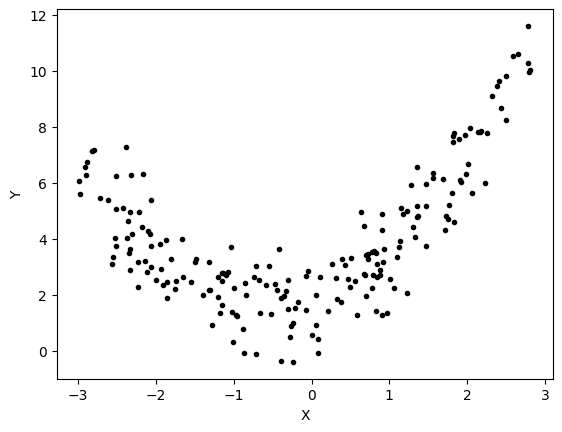

In [77]:
plt.plot(X,y,'k.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [78]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size =0.2,random_state =2)

In [79]:
lr = LinearRegression()

In [80]:
lr.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.17673480790540508

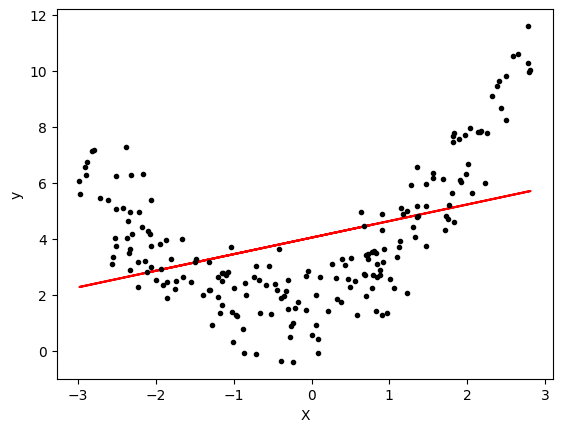

In [82]:
plt.plot(X_train,lr.predict(X_train),'r-')
plt.plot(X,y,'k.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Applying Polynomial Linear Regression

In [83]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [84]:
print(X_train[0])
print(X_train_trans[0])

[-2.05785149]
[ 1.         -2.05785149  4.23475274]


In [85]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [86]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.8359731154178017

In [87]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.85043524 0.83457647]]
[1.88198573]


In [88]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)


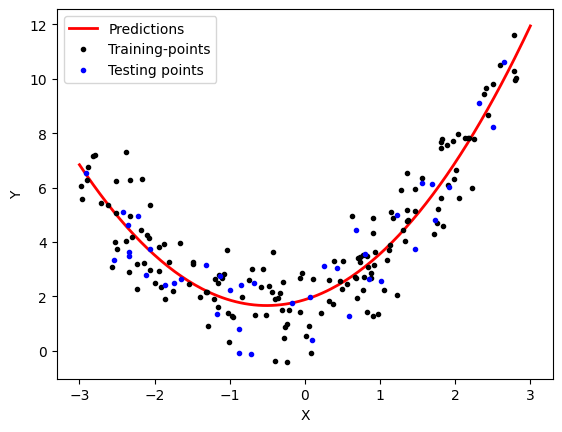

In [89]:
plt.plot(X_new,y_new,'r-',linewidth=2,label = "Predictions")
plt.plot(X_train,y_train,'k.',label = 'Training-points')
plt.plot(X_test,y_test,'b.',label='Testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [90]:
def polynomial_regression(degree):
  X_new=np.linspace(-3,3,100).reshape(100,1)
  X_new_poly = poly.transform(X_new)

  polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ('poly_features',polybig_features),
      ('std_scaler',std_scaler),
      ('lin_reg',lin_reg),
  ])
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new,y_newbig,'r',label = 'Degree' + str(degree),linewidth = 2)

  plt.plot(X_train,y_train,'k.',linewidth =3) # these are training points
  plt.plot(X_test,y_test,'b.',linewidth =3) # these are testing points
  plt.legend(loc='upper left')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.axis([-3,3,0,10])
  plt.show()

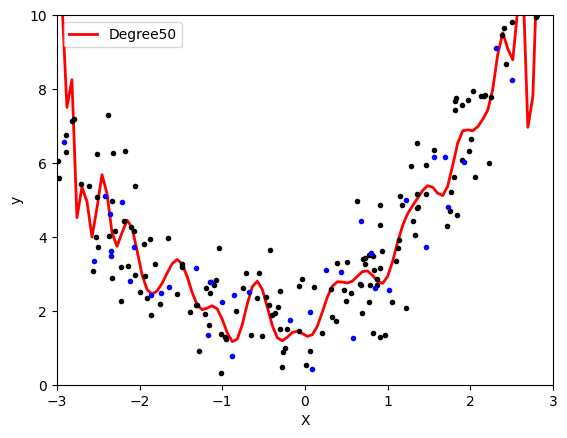

In [91]:
polynomial_regression(degree = 50)

# Curve showing the over-fitting problem

# 3D polynomial regression

In [92]:
x = 7 * np.random.rand(100,1)- 2.8
y = 7 * np.random.rand(100,1)- 2.8

z = x**2 + y**2 + 0.2*x + 0.1*x*y + 2 + np.random.randn(100,1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [93]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [94]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)


x_input  = np.linspace(x.min(),x.max(),10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

In [95]:
import plotly.graph_objects as go
fig = px.scatter_3d(df, x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z = z_final))
fig.show()

# After applying the linear regression the above graph look like this.
# Now applying the polynomial features

In [96]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [126]:
poly = PolynomialFeatures(degree=40)
X_multi_trans = poly.fit_transform(X_multi)


In [127]:
print("Input",poly.n_features_in_)
print("Output",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Output 861
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 ...
 [ 2 38]
 [ 1 39]
 [ 0 40]]


In [128]:
X_multi_trans.shape

(100, 861)

In [129]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [130]:
X_test_multi = poly.transform(final)

In [131]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [132]:
fig = px.scatter_3d(x=x.ravel(),y = y.ravel(),z=z.ravel())

fig.add_trace(go.Surface(x = x_input,y = y_input,  z = z_final))

fig.update_layout(scene = dict(zaxis = dict(range = [0,35])))

fig.show()

# Over-fitting graph in 3D